# Model Evaluation and Comparison

This notebook evaluates and compares all models used in the stroke prediction project, following the CMSE492 final project requirements. It includes tables of metrics, training and inference times, visual comparisons, a training methodology summary, and a final selection of the best-performing model.


This cell loads the saved metrics for the baseline, Random Forest, and neural network models and combines them into a single table for easier comparison.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

baseline = pd.read_csv("results/baseline_metrics.csv")
rf = pd.read_csv("results/random_forest_metrics.csv")
nn = pd.read_csv("results/nn_metrics.csv")

all_results = pd.concat([baseline, rf, nn], ignore_index=True)
all_results


,Model,Train_time,Inference_time,Precision,Recall,F1,ROC_AUC
0,Majority Baseline,NaN,NaN,0.000000,0.00,0.000000,NaN
1,Logistic Regression Baseline,NaN,NaN,1.000000,0.02,0.039216,0.842160
2,Random Forest,0.410345,0.057177,0.137143,0.48,0.213333,0.810864
3,Shallow Neural Network,4.720308,0.285983,0.140893,0.82,0.240469,0.834156


## Training Methodology Summary

The table below summarizes the model parameters, hyperparameters, loss functions, and regularization used during training.

| Model | Parameters | Hyperparameters | Loss Function | Regularization |
|-------|------------|------------------|----------------|----------------|
| **Majority Baseline** | None | None | None | None |
| **Logistic Regression** | One weight per feature | C, solver | Logistic loss | L1 or L2 |
| **Random Forest** | Multiple decision trees | n_estimators, max_depth, min_samples_split, min_samples_leaf | Gini impurity | Depth limits, min samples per node |
| **Shallow Neural Network** | Dense layers (32 → 16 → 1) | Learning rate, batch size, epochs | Binary cross-entropy | Dropout + early stopping |


This table compares precision, recall, F1 score, and ROC-AUC across all models as required by the project. These metrics show relative strengths and weaknesses for each approach.


In [3]:
metrics_table = all_results[["Model", "Precision", "Recall", "F1", "ROC_AUC"]]
metrics_table


,Model,Precision,Recall,F1,ROC_AUC
0,Majority Baseline,0.000000,0.00,0.000000,NaN
1,Logistic Regression Baseline,1.000000,0.02,0.039216,0.842160
2,Random Forest,0.137143,0.48,0.213333,0.810864
3,Shallow Neural Network,0.140893,0.82,0.240469,0.834156


This table compares the computational cost of each model by reporting training and inference times. This satisfies the requirement to compare algorithm difficulty and resource usage.


In [4]:
time_table = all_results[["Model", "Train_time", "Inference_time"]]
time_table


,Model,Train_time,Inference_time
0,Majority Baseline,NaN,NaN
1,Logistic Regression Baseline,NaN,NaN
2,Random Forest,0.410345,0.057177
3,Shallow Neural Network,4.720308,0.285983


This bar chart compares F1 scores, which balance precision and recall an important metric for imbalanced medical datasets.


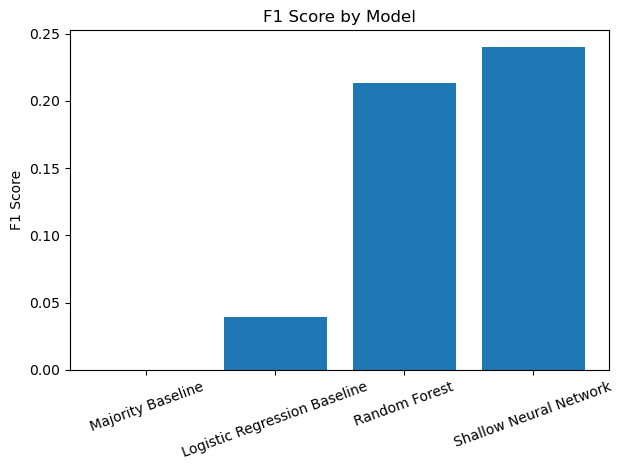

In [5]:
plt.figure()
plt.bar(all_results["Model"], all_results["F1"])
plt.ylabel("F1 Score")
plt.title("F1 Score by Model")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


This cell identifies the best-performing model using F1 score, which is appropriate due to the severe class imbalance in the dataset.


In [6]:
best_model = all_results.loc[all_results["F1"].idxmax()]
best_model


Model             Shallow Neural Network
Train_time                      4.720308
Inference_time                  0.285983
Precision                       0.140893
Recall                              0.82
F1                              0.240469
ROC_AUC                         0.834156
Name: 3, dtype: object